ƒ∞nternet √ºzerindeki a√ßƒ±k veri kaynaklarƒ±, bu verileri kullanan uygulamalar geli≈ütirmek isteyenler ya da √ºzerinde √ßalƒ±≈ütƒ±klarƒ± problemlere farklƒ± alanlardan derledikleri verileri de katmak isteyenler i√ßin bir√ßok imkan sunuyor. √ñrnek olarak Twitter √ºzerindeki tweetleri kullanarak duygu analizi yapmak ya da hava durumu, hisse senedi fiyatlarƒ± gibi verileri de analizinize katmak a√ßƒ±k veri kaynaklarƒ± sayesinde m√ºmk√ºn.

ƒ∞lker, [Star Wars](http://www.veridefteri.com/2017/12/13/veri-defteri-ben-seviyor-cok/) filmlerinin verisi kullanƒ±larak hazƒ±rlanmƒ±≈ü bir uygulama ara y√ºz√ºnden (Application Programming Interface, API) bahsetmi≈üti. Bu yazƒ±da benzer bir uygulamayƒ± Foursquare API'ƒ± √ºzerinden yapacaƒüƒ±z.

Bildiƒüiniz gibi, Foursquare konum temelli arama yapmanƒ±zƒ± saƒülayan ve istediƒüiniz konularda (restoran, ziyaret edilecek yerler) tavsiyeler alabileceƒüiniz bir servis. Konum temelli uygulamalar geli≈ütirmek ya da konuma baƒülƒ± sorularƒ±nƒ±za cevap aramak i√ßin Foursquare √ºzerindeki verilerden yararlanabilirsiniz.

Foursquare API'ƒ±nƒ± kullanmak i√ßin ilk yapmamƒ±z gereken [Foursquare](https://developer.foursquare.com/) √ºzerinden bir geli≈ütirici (developer) hesabƒ± a√ßmak. Geli≈ütirici hesabƒ± √ºzerinden 'Yeni bir uygulama olu≈ütur'a girerek uygulamanƒ±zƒ±n detaylarƒ±nƒ± olu≈üturabilirsiniz.

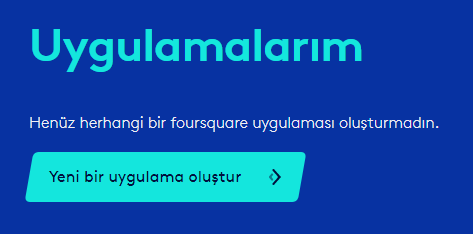

In [1]:
from IPython.display import Image
Image("uygulama.PNG")

Uygulamanƒ±z i√ßin bir isim ve web sayfasƒ± girmeniz gerekiyor. 

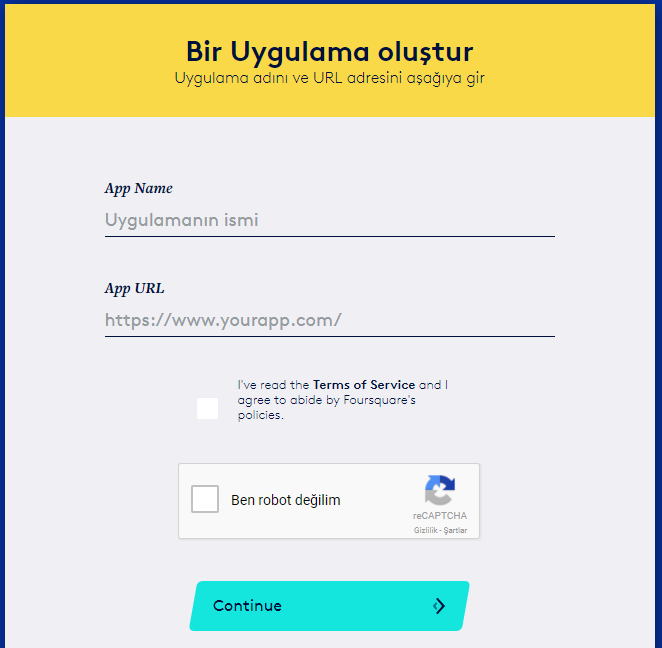

In [2]:
Image("uygulamaolustur.PNG")

Bir sonraki a≈üamada hesap tipini se√ßmelisiniz. Ben deneme amacƒ±yla 'Sandbox' tipi bir hesap kullandƒ±m. 'Sandbox' hesabƒ±nƒ±n k√∂t√º yanƒ± g√ºnl√ºk 1000 adet sorguyla kƒ±sƒ±tlƒ± olmasƒ±. Hesabƒ±nƒ±zƒ± doƒürulatarak, √ºcretsiz olarak 'Personal' tipi bir hesap a√ßabilir ve daha fazla sorgulama yapabilirsiniz. 

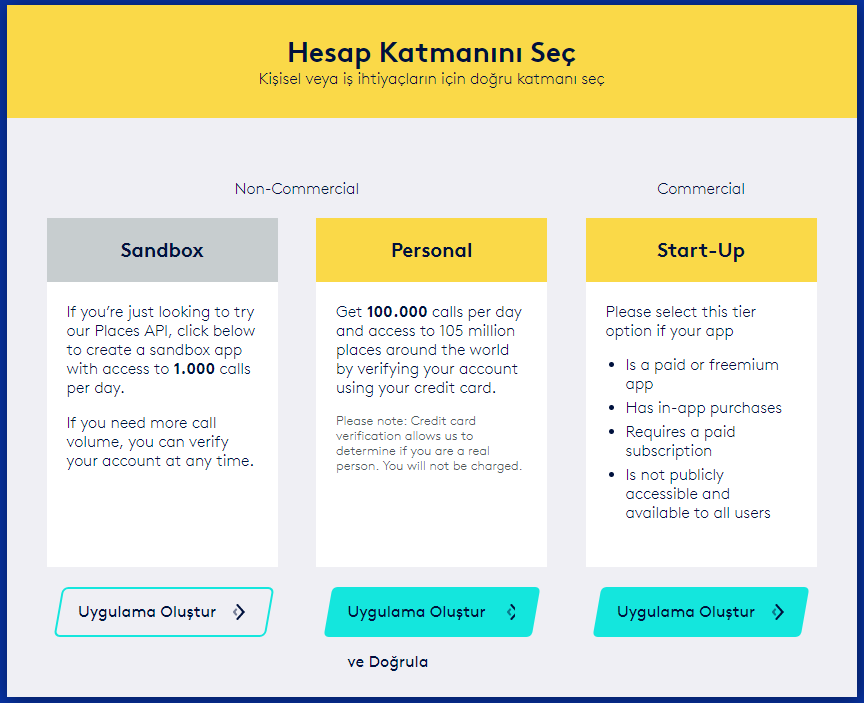

In [3]:
Image("hesap.PNG")

Hesap tipini se√ßtikten sonra, Foursquare size 'Client ID' ve 'Client Secret' adlƒ± iki anahtar saƒülayacak. Bu anahtarlar API ile haberle≈ümenize olanak verecek ki≈üisel bilgilerinizdir. Bu nedenle a≈üaƒüƒ±daki dosyada bu anahtarlarƒ± gizledim.

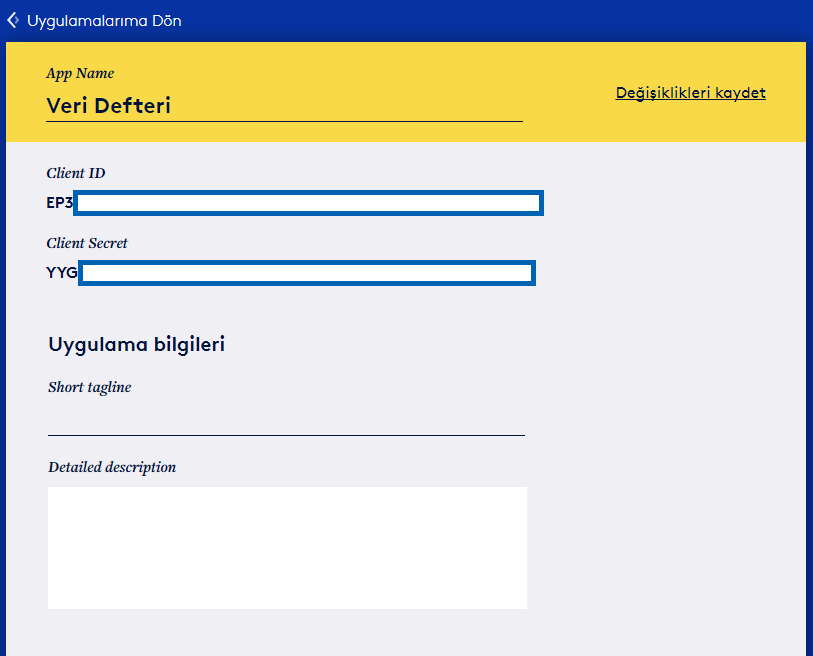

In [4]:
Image("anahtar.png")

Bu i≈ülemleri yaptƒ±ktan sonra artƒ±k API'ƒ± kullanabilirsiniz. Kayƒ±t i√ßin gerekli adƒ±mlarƒ± [FourSquare API dok√ºmanƒ±nda](https://developer.foursquare.com/docs/api/getting-started) bulabilirsiniz. API'ƒ± kullanmak i√ßin ilk olarak 'Client ID' ve 'Client Secret' anahtarlarƒ±nƒ± tanƒ±tƒ±yoruz. Anahtarlarƒ± a≈üaƒüƒ±da da gizledim.

In [5]:
client_id = 'EP3...............'
client_secret = 'YYG...............'

Artƒ±k API'ƒ± kullanmaya hazƒ±rƒ±z. Daha √∂nce [Star Wars](http://www.veridefteri.com/2017/12/13/veri-defteri-ben-seviyor-cok/) API'nda olduƒüu gibi Foursquare API'ndan √ßekeceƒüimiz veri de JSON formatƒ±nda. Yani veri *alan anahtarƒ±: deƒüer* ≈üeklinde ikililer olarak tutuluyor. S√ºsl√º parantezler yardƒ±mƒ±yla i√ß i√ße ge√ßmi≈ü bir yapƒ± kurmak da m√ºmk√ºn. JSON formatƒ± Kaan'ƒ±n [yazƒ±sƒ±nda](http://www.veridefteri.com/2017/12/11/python-programlamaya-giris-sayilar-aritmetik-temel-veri-yapilari/) deƒüindiƒüi Python s√∂zl√ºkleri ile aynƒ± yapƒ±da.

ƒ∞lk olarak mekan aramayƒ± deneyelim. Veriler JSON formatƒ±nda olduƒüu i√ßin `json` paketini ve API'a sorgu g√∂ndermek i√ßin de `requests` paketini kullanacaƒüƒ±z. A≈üaƒüƒ±daki √∂rnekte Ayasofya'yƒ± bularak ba≈ülayalƒ±m.

In [6]:
# API'a sorgu g√∂ndermek i√ßin requests paketini kullanƒ±yoruz.
import requests
# JSON formatƒ±ndaki verileri almak ve yazdƒ±rmak i√ßin json paketine ihtiyacƒ±mƒ±z var.  
import json

# Arama yapmak istediƒüimiz i√ßin a≈üaƒüƒ±daki URL'yi kullanƒ±yoruz. Arama dƒ±≈üƒ±ndaki √∂rneklerde URL deƒüi≈üecek.
url = 'https://api.foursquare.com/v2/venues/search'

# Sorgu parametrelerini tanƒ±mlayalƒ±m. 
"""
client_id ve client_secret kendimizi Foursquare'e tanƒ±mlamak i√ßin kullandƒ±ƒüƒ±mƒ±z anahtarlar.
v deƒüeri API'ƒ±n hangi versiyonunu kullandƒ±ƒüƒ±mƒ±zƒ± g√∂steriyor ve zorunlu bir alan.
query deƒüeri de yapmak istediƒüimiz sorgunun arama kelimesi
"""
params = dict(
  client_id=client_id,
  client_secret=client_secret,
  v='20170801',
  query='Ayasofya'
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(json.dumps(data,indent = 4))

{
    "meta": {
        "code": 400,
        "errorType": "param_error",
        "errorDetail": "Must provide parameter ll",
        "requestId": "5a634a4b9fb6b764642942b1"
    },
    "response": {}
}


Kodumuz √ßalƒ±≈ütƒ± gibi g√∂r√ºnse de aslƒ±nda bir hata aldƒ±k. Arama yaparken arama yaptƒ±ƒüƒ±mƒ±z yakla≈üƒ±k yeri de vermemiz gerekiyor. Bunu yapmanƒ±n iki yolu var. `ll` ile bir yer koordinatƒ± verebiliriz (Tarihi yarƒ±mada yakla≈üƒ±k olarak 41.01 enleminde ve 28.97 boylamƒ±nda) ya da `near` ile bulunduƒüu b√∂lge hakkƒ±nda bir ipucu verebiliriz. Ben, ayrƒ±ca, d√∂nd√ºr√ºlen sonu√ß sayƒ±sƒ±nƒ± limitlemeyi tercih ettim. Bu sayede kar≈üƒ±mƒ±za tek bir sonu√ß √ßƒ±kacak ve adƒ±nda Ayasofya olan diƒüer yerlerin de veri setinde yer almasƒ±nƒ± engelleyeceƒüiz.

In [7]:
"""
ll deƒüeri enlem ve boylam cinsinden aramak istediƒüimiz yeri belirtiyor ve tarihi yarƒ±madanƒ±n koordinatlarƒ±na denk geliyor.
limit deƒüeriyle tek bir sonu√ß d√∂nd√ºrmeyi tercih ettik.
"""
params = dict(
  client_id=client_id,
  client_secret=client_secret,
  v='20170801',
  ll="41.01,28.97",
  query='Ayasofya',
  limit=1
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(json.dumps(data,indent = 4, ensure_ascii= False))

{
    "meta": {
        "code": 200,
        "requestId": "5a634a4bf594df01e978d8db"
    },
    "response": {
        "venues": [
            {
                "id": "4bc8088f15a7ef3b6b857ada",
                "name": "Ayasofya | Hagia Sophia (Ayasofya)",
                "contact": {
                    "phone": "+902125221750",
                    "formattedPhone": "+90 212 522 17 50"
                },
                "location": {
                    "address": "Ayasofya Myd. Sultanahmet",
                    "lat": 41.0082839956457,
                    "lng": 28.979008518719493,
                    "distance": 780,
                    "postalCode": "34122",
                    "cc": "TR",
                    "city": "Fatih",
                    "state": "ƒ∞stanbul",
                    "country": "T√ºrkiye",
                    "formattedAddress": [
                        "Ayasofya Myd. Sultanahmet",
                        "34122 Fatih",
                        "T√ºrkiye"
       

Veri setinde `reponse` anahtarƒ±nƒ±n altƒ±nda sorgulamamƒ±zla ili≈ükili sonu√ßlara eri≈üebiliriz. Sonucun altƒ±nda koyduƒüumuz limit sayesinde tek bir mekan (`venues`) bulunmakta. Burada √∂nemli olan anahtarlar:

| Anahtar       | Anlam                            |               Deƒüer              |
|:------------- |:---------------------------------|:---------------------------------|
| id            | Mekanƒ±n belirteci                | 4bc8088f15a7ef3b6b857ada         |
| name          | Mekanƒ±n adƒ±                      | Ayasofya Hagia Sophia (Ayasofya) |
| lat           | Boylamƒ±                          | 41.00824813964318                |
| lng           | Enlemi                           | 28.978616263778942               |
| distance      | Aradƒ±ƒüƒ±mƒ±z koordinatlara uzaklƒ±k | 749 metre                        |
| checkinsCount | Check-in sayƒ±sƒ±                  | 223738                           |
| usersCount    | Kullanƒ±cƒ± sayƒ±sƒ±                 | 183768                           |
| tipCount      | Tavsiye sayƒ±sƒ±                   | 1147                             |

Ayasofya'nƒ±n Foursquare [sayfasƒ±nƒ±](https://tr.foursquare.com/v/ayasofya--hagia-sophia/4bc8088f15a7ef3b6b857ada) ziyaret ederek yukarƒ±daki deƒüerleri kontrol edebilirsiniz. √ñzellikle check-in sayƒ±sƒ±, kullanƒ±cƒ± sayƒ±sƒ±, tavsiye sayƒ±sƒ± ve tavsiyeler konumlarƒ±n pop√ºlerliƒüi hakƒ±nda ipucu verecek bilgiler.

Bir diƒüer arama y√∂ntemi olarak da Paris yakƒ±nƒ±ndaki Eyfel Kulesi'ni arayalƒ±m. Bu sefer koordinat vermek yerine yakla≈üƒ±k yeri belirteceƒüiz (`near = "Paris"`)

In [8]:
params = dict(
  client_id=client_id,
  client_secret=client_secret,
  v='20170801',
  near = "Paris",
  query='Eiffel Tower', 
  limit = 1
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(json.dumps(data['response']['venues'],indent = 4, ensure_ascii= False))

[
    {
        "id": "51a2445e5019c80b56934c75",
        "name": "Tour Eiffel",
        "contact": {
            "phone": "+33892701239",
            "formattedPhone": "+33 892 70 12 39",
            "twitter": "latoureiffel",
            "instagram": "toureiffelofficielle",
            "facebook": "141184112585566",
            "facebookUsername": "TourEiffel",
            "facebookName": "Tour Eiffel"
        },
        "location": {
            "address": "5 avenue Anatole France",
            "crossStreet": "Parc du Champ-de-Mars",
            "lat": 48.858249354605626,
            "lng": 2.2944259643554683,
            "labeledLatLngs": [
                {
                    "label": "display",
                    "lat": 48.858249354605626,
                    "lng": 2.2944259643554683
                }
            ],
            "postalCode": "75007",
            "cc": "FR",
            "city": "Paris",
            "state": "√éle-de-France",
            "country": "France",
   

G√∂rd√ºƒü√ºn√ºz gibi koordinat yerine yakla≈üƒ±k olarak yer vermek de aynƒ± i≈üi g√∂r√ºyor. ≈ûimdi Eyfel Kulesi'yle ilgili en pop√ºler 10 yorumu g√∂relim. Bir mekanla ilgili tavsiyeleri g√∂rmek i√ßin mekanƒ±n belirtecini de url'ye eklememiz gerekiyor.  Yorumlarƒ±n metin kƒ±smƒ±yla ilgileneceƒüimiz i√ßin, s√ºsl√º parantez yapƒ±sƒ±na g√∂re, `response` - `tips` - `items` alanlarƒ±na eri≈ümemiz gerekiyor. Hangi alanlara eri≈ümemiz gerektiƒüini a≈üaƒüƒ±daki kodda bulunan `data` s√∂zl√ºƒü√ºn√ºn yapƒ±sƒ±nƒ± inceleyerek bulabilirsiniz. Bu alanlarƒ±n altƒ±ndaki her bir yorum i√ßin de `text` alanƒ±nƒ±n deƒüerini bastƒ±ralƒ±m.

In [9]:
# Dok√ºmandaki url "https://api.foursquare.com/v2/venues/VENUE_ID/tips" ≈üeklinde.
# VENUE_ID'yi sorgulayacaƒüƒ±mƒ±z mekana g√∂re deƒüi≈ütirmemiz gerekiyor.
# Eiffel Kulesi'nin belirteci: 51a2445e5019c80b56934c75
url = "https://api.foursquare.com/v2/venues/51a2445e5019c80b56934c75/tips"
    
params = dict(
  client_id=client_id,
  client_secret=client_secret,
  v='20170801',
  sort = "popular",
  limit=10
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)

for tavsiye in data['response']['tips']['items']:
    print(tavsiye['text'])

Icon of Paris. Nuff said. Go to the top and enjoy the view.
Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.
La tour Eiffel est l'ic√¥ne de Paris, pourtant, √† l'exception de vos photos traditionnelles avec la tour sur l'arri√®re-plan il n'y a pas grand-chose. Vous devriez aller avant 9h00.
Aussi, vous devriez y aller la nuit. Vous devriez avoir une vue incroyable avec une superbe photo.
Welcome to one of the world's most iconic monuments üòú From the üîù you can take beautiful shots üòúüòçüì∏üëç
I went there for fun, the joy of being on the top, and sightseeing. I'd suggest buying the tickets in advance to avoid the long queues.
Sit by the river right next to the tower for best view at midnight when it sparkles for 5 mins. Another option is to see it from louvre that's a further view! Beautiful 5 mins of ur life!
The famous landmark! Take a tour to the summit that cost ‚Ç¨17 for an adult. Beware of pickpocket in th

Eyfel Kulesi'yle ilgili tavsiyeleri almak i√ßin Eyfel Kulesi'nin belirtecini de url'ye eklemek durumunda kaldƒ±k. Bunu yapmadan da tavsiyelere ula≈ümak m√ºmk√ºn. Foursquare API'ƒ±nƒ± kullanmanƒ±n bir diƒüer yolu linkteki [Github](https://github.com/mLewisLogic/foursquare) dizinindeki k√ºt√ºphane. Python i√ßin API'ƒ± kullanmayƒ± kolayla≈ütƒ±ran `foursquare` k√ºt√ºphanenesini a≈üaƒüƒ±daki [sihirli ifadeyle](http://www.veridefteri.com/2017/11/28/ipython-sihirli-ifadeler/) y√ºkleyebilirsiniz. Sadece diyez i≈üaretini kaldƒ±rmanƒ±z gerekecek.

In [10]:
# Yanlƒ±≈ülƒ±kla y√ºklemeyi engellemek i√ßin sihirli ifade yorum olarak girildi.
# foursquare paketini y√ºklemek i√ßin a≈üaƒüƒ±daki satƒ±rda # i≈üaretini kaldƒ±rmanƒ±z yeterli.
# !pip install foursquare

Paketi y√ºkledikten sonra, kendimizi tanƒ±tmamƒ±z gerekiyor. Kendimizi tanƒ±tmak i√ßin yukarƒ±da olu≈üturduƒüunuz anahtarlarƒ± kullanabilirsiniz.

In [11]:
import foursquare as fs
#Anahtarlarƒ±mƒ±zƒ± tanƒ±tarak izin alƒ±yoruz.
client = fs.Foursquare(client_id=client_id, client_secret=client_secret)
auth_uri = client.oauth.auth_url()

≈ûimdi Ayasofya yakƒ±nlarƒ±ndaki restoranlarƒ± arayalƒ±m. 1.5 km mesafedeki en pop√ºler 10 restoranƒ± bulalƒ±m ve uzaklƒ±klarƒ±yla birlikte sonu√ßlarƒ± g√∂relim. Kullanabileceƒüiniz ba≈üka sƒ±ralama y√∂ntemleri ve parametreleri √∂ƒürenmek i√ßin API dok√ºmantasyonu size yardƒ±mcƒ± olacaktƒ±r.

In [12]:
params = dict(
  query = 'restaurant',
  ll = '41.00824813964318,28.978616263778942',
  radius = 1500,
  sort = "popular",
  limit=10
)

data = client.venues.search(params=params)
for restaurant in data['venues']:
    print("Restoran adƒ±: {} Uzaklƒ±k: {} metre".format(restaurant['name'], restaurant["location"]["distance"]))

Restoran adƒ±: Neyzen Restaurant Uzaklƒ±k: 1253 metre
Restoran adƒ±: Sefa-i H√ºrrem Cafe & Restaurant Uzaklƒ±k: 1393 metre
Restoran adƒ±: Me≈üale Restaurant & Caf√® Uzaklƒ±k: 299 metre
Restoran adƒ±: Hamdi Restaurant Uzaklƒ±k: 1235 metre
Restoran adƒ±: Afrodit Restaurant Uzaklƒ±k: 1247 metre
Restoran adƒ±: Namlƒ± Cafe ≈ûark√ºteri Restaurant Uzaklƒ±k: 1191 metre
Restoran adƒ±: Fuego Cafe & Restaurant Uzaklƒ±k: 116 metre
Restoran adƒ±: Seoul Restaurant Uzaklƒ±k: 349 metre
Restoran adƒ±: Albura Kathisma Cafe & Restaurant Uzaklƒ±k: 316 metre
Restoran adƒ±: Olive Anatolian Restaurant Uzaklƒ±k: 463 metre


ƒ∞ki sorgununda da parametrelerini s√∂zl√ºk yapƒ±sƒ±nda vermemiz gerekti. Aynƒ± zamanda kullandƒ±ƒüƒ±mƒ±z parametreler de aynƒ±ydƒ±. Orijinal API'ƒ± kullanmakla `foursquare` paketini kullanmak arasƒ±nda g√∂z√ºken iki fark var:
 
* Sonu√ßlarƒ± g√∂rmek i√ßin `response` alanƒ±na eri≈ümek zorunda kalmadƒ±k. `foursquare` paketi bize zaten `response` alanƒ±nƒ± d√∂nd√ºr√ºyor, sorgunuzla ilgili √ºst veriyi (`metadata`) d√∂nd√ºrm√ºyor.
* Sorgu i√ßin herhangi bir `url` girmemiz gerekmedi. `foursquare` paketi sayesinde adresi ezberlemenize ya da ara≈ütƒ±rmanƒ±za gerek kalmadƒ±. Ancak paketin altƒ±ndaki fonksiyonlarƒ± √∂ƒürenmeniz gerekiyor. 

Bahsettiƒüim konular dƒ±≈üƒ±nda bir fark yok gibi. Eyfel Kulesi'yle ilgili tavsiyeleri bir de `foursquare` paketiyle alalƒ±m.

In [13]:
params = dict(
  sort = "popular",
  limit=10
)
data = client.venues.tips('51a2445e5019c80b56934c75', params=params)
for tavsiye in data['tips']['items']:
    print(tavsiye['text'])

Icon of Paris. Nuff said. Go to the top and enjoy the view.
Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.
La tour Eiffel est l'ic√¥ne de Paris, pourtant, √† l'exception de vos photos traditionnelles avec la tour sur l'arri√®re-plan il n'y a pas grand-chose. Vous devriez aller avant 9h00.
Aussi, vous devriez y aller la nuit. Vous devriez avoir une vue incroyable avec une superbe photo.
Welcome to one of the world's most iconic monuments üòú From the üîù you can take beautiful shots üòúüòçüì∏üëç
I went there for fun, the joy of being on the top, and sightseeing. I'd suggest buying the tickets in advance to avoid the long queues.
Sit by the river right next to the tower for best view at midnight when it sparkles for 5 mins. Another option is to see it from louvre that's a further view! Beautiful 5 mins of ur life!
The famous landmark! Take a tour to the summit that cost ‚Ç¨17 for an adult. Beware of pickpocket in th

`foursquare` paketini kullanmadƒ±ƒüƒ±mƒ±zda sorgu adresini deƒüi≈ütirmemiz (adresin i√ßine mekanƒ±n belirtecini girmemiz) gerekmi≈üti. `foursquare` paketiyle mekan belirtecini bir parametre olarak sorguya vermemiz yeterli oldu. Paketi kullanmak, adresleri girmemek ve deƒüi≈ütirmek zorunda kalmamak nedeniyle bana daha kolay geldi. Ancak paketin dok√ºmantasyonunun √ßok da iyi olmadƒ±ƒüƒ±nƒ± belirtmem gerek.

Hem Foursquare API'ƒ± hem de `foursquare` paketi √ºzerinden ba≈üka bilgilere eri≈ümek m√ºmk√ºn. Kullanƒ±cƒ±larƒ±n check-in yaptƒ±ƒüƒ± ve beƒüendiƒüi yerlere, diƒüer bilgilerine, y√ºklediƒüi fotoƒüraflara API √ºzerinden eri≈üebiliyoruz. Mekanlarla ilgili olarak da √ßalƒ±≈üma saatleri, mekanƒ±n fotoƒüraflarƒ±, tavsiyeler gibi verileri derleyebiliyoruz. Aynƒ± zamanda fotoƒüraf, check-in ve tavsiyeler i√ßin API sorgularƒ± da mevcut.

Bu yazƒ±ya Jupyter defteri olarak [Github](https://github.com/sibirbil/VeriDefteri) dizinimizden eri≈üebilirsiniz.